# 3. Tehtävä (Päätöspuut ja satunnaismetsät)

## 3.1 Tehtävän ymmärtäminen

Tässä työssä pyrimme:

- Tutkimaan päätöspuiden käyttöä avoimen ja helposti luettavan päätösmallin rakentamiseksi
- Oppimaan käyttämään `Random forest` -algoritmia ennustamisen tehokkuuden parantamiseksi

## 3.2 Datan ymmärtäminen

Tehtävässä käytetään tietoja sen määrittämiseksi, onko sivusto phishing-sivusto vai ei. Annetaan tietojoukon latautua ja tarkastella sitä:

In [2]:
from ucimlrepo import fetch_ucirepo 
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327)
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets
# metadata 
pprint(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 

df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

{'abstract': 'This dataset collected mainly from: PhishTank archive, '
             'MillerSmiles archive, Googleâ€™s searching operators.',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'One of the challenges faced by our research '
                                'was the unavailability of reliable training '
                                'datasets. In fact this challenge faces any '
                                'researcher in the field. However, although '
                                'plenty of articles about predicting phishing '
                                'websites have been disseminated these days, '
                                'no reliable training dataset ha

In [3]:
df_combined = pd.concat([df_x, df_y], axis=1)
df_combined.isnull().sum()

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
result                        0
dtype: i

In [4]:
df_combined.describe()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Päätelmät tietojen tarkastelun jälkeen:

1. Tässä tietojoukossa on 30 ominaisuutta (30 saraketta) ja 1 kohdearvoja sisältävä kolumni.
2. Jokaisessa sarakkeessa on 11055 arvoriviä.
3. Kaikki tiedot ovat kokonaislukuja.
4. Puuttuvia arvoja ei ole.
5. Sarakkeiden arvot ovat 1, 0 tai -1.

**Sarakkeelle `result` tämä tarkoittaa:**
"1" - sivusto on phishing, "-1" - sivusto on laillinen, "0" - epäilyttävä.

**Muissa sarakkeissa tämä tarkoittaa:**
"1" - phishing-sivuston piirre, "-1" - laillisen piirre, "0" - phishing-epäily.

- `having_ip_address`: "1" jos URL sisältää IP-osoitteen, "-1" muussa tapauksessa.
- `url_length`: pituus alle 54 merkkiä - "-1", yli 75 merkkiä - "1", muuten "0".
- `shortining_service`: URL-lyhennyspalvelun käyttö. "1" - käytössä, "-1" - ei käytössä.
- `having_at_symbol`: "@" symbolin esiintyminen URL-osoitteessa. "1" - on, "-1" - ei ole.
- `double_slash_redirecting`: "//" merkkien esiintyminen URL-pathissa. "1" - on, "-1" - ei ole.
- `prefix_suffix`: Prefiksi tai suffiksi domain-nimessä. "1" - on, "-1" - ei ole.
- `having_sub_domain`: pisteiden esiintyminen domain-nimessä. "1" - yli 2 pistettä, "-1" - 1 piste, "0" - 2 pistettä.
- `sslfinal_state`: "-1" - sertifikaatti myönnetty luotetulta taholta ja voimassa yli vuoden, "0" - ei luotettavalta taholta, "1" - muut tapaukset.
- `domain_registration_length`: domainin rekisteröintiaika: "1" - umpeutuu vuodessa tai vähemmän, "-1" - yli vuosi.
- `favicon`: favicon ladattu ulkopuoliselta resurssilta. "1" - ladattu, "-1" - ei ladattu.
- `port`: Epätavanomaisen portin käyttö. "1" - käytössä, "-1" - ei käytössä.
- `https_token`: http-tokenin käyttö URL-osoitteessa. "1" - käytössä, "-1" - ei käytössä.
- `request_url`: jos alle 22% URL-osoitteista pyytää tietoja muista domeeneista, niin "-1". Jos yli 22%, mutta alle 61%, niin "0", yli 61% niin "1".
- `url_of_anchor`: jos alle 31% linkeistä vie muihin sivustoihin — "-1", 31%-67% — "0", muuten — "1".
- `links_in_tags`: linkit tageissa `<Meta>, <Script>, <Link>`. Jos alle 17% linkeistä vie muihin sivustoihin — "-1", 17%-81% — "0", muuten — "1".
- `sfh`: jos SFH (Server Form Handler) tyhjä tai "about:blank" — "-1", jos SFH viittaa toiseen domeeniin — "0", muuten — "1".
- `submitting_to_email`: "mailto" tai "mail()" käyttö sivustolla. "1" - käytössä, "-1" - ei käytössä.
- `abnormal_url`: epätavallinen URL. Jos hostingin nimi ei sisälly URLiin "1" - epätavallinen, "-1" - tavallinen.
- `redirect`: uudelleenohjausten määrä. Jos enemmän kuin 4, niin "1", 2-4, niin "0", muuten "-1".
- `on_mouseover`: tapahtuman "onmouseover" käyttö tilarivin muuttamiseen. "1" - käytössä, "-1" - ei käytössä.
- `rightclick`: hiiren oikean napsautuksen estäminen. "1" - estetty, "-1" - sallittu.
- `popupwindow`: ponnahdusikkuna sisältää syöttölomakkeen. "1" - sisältää, "-1" - ei sisällä.
- `iframe`: iframe-tagin käyttö. "1" - käytössä, "-1" - ei käytössä.
- `age_of_domain`: domainin ikä. Jos alle 6 kuukautta, niin "1", muuten "-1".
- `dnsrecord`: DNS-merkintöjen puuttuminen. "1" - puuttuu, "-1" - löytyy.
- `web_traffic`: verkkosivun rank < 100,000 (by Alexa). "-1" - alle 100,000, "0" - yli 100,000, muuten "1".
- `page_rank`: PageRank < 0.2. "1", PageRank > 0.2. "-1".
- `google_index`: jos sivu on Googlen indeksissä, niin "-1", muussa tapauksessa "1".
- `links_pointing_to_page`: Ulkoiset linkit sivuun. "-1" - yli 2, "1" - ei linkkejä, "0" - 1 tai 2 linkkiä.
- `statistical_report`: host sisältyy "Top Phishing IPs or Top Phishing Domains" raporttiin. "1" - sisältyy, "-1" - ei sisälly.

Jaetaan tiedot ominaisuuksiin ja kohdearvoihin:

In [5]:
df_x 

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [6]:
df_x.describe(include='all')

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_y

,result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [8]:
df_y.describe(include='all')

,result
count,11055.000000
mean,0.113885
std,0.993539
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


#### Osion yhteenvetona:

1. Tiedoista ei ole puuttuvia arvoja, joten täyttömenetelmän valitseminen ei ole tarpeen.
2. Kaikki tiedot ovat kokonaislukuja, mutta ne luokittelevat phishing-sivustojen piirteitä: "1" - phishing-sivusto, "-1" - laillinen sivusto, "0" - epäilyttävä sivusto.
3. Tiedot sisältävät 30 ominaisuutta (saraketta) ja 1 kohdearvon.
4. Saatiin käsitys siitä, miten kullekin ominaisuudelle määritetään arvot.

## 3.3 Datan valmistelu

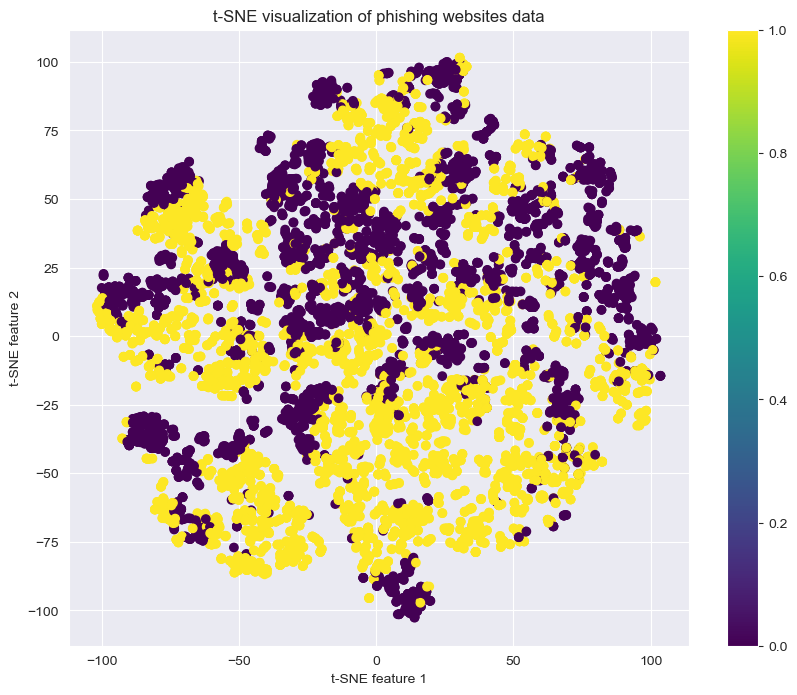

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Muunnetaan luokkamerkit numeroiksi, jos sitä ei ole tehty
# Esimerkiksi, jos -1, 0, 1, niiden on oltava samassa mittakaavassa värejä varten
df_y_mapped = df_y.replace({-1: 0, 1: 1})

# Luodaan t-SNE-malli
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(df_x)

# Muunnetaan df_y_mapped yksiulotteiseksi taulukoksi
y_colors = df_y_mapped.values.ravel()

# Visualisointi
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_colors, cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE visualization of phishing websites data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()



Tämä visualisointi mahdollistaa poikkeavuuksien tai säännönmukaisuuksien tarkastelun ja sitten näiden havaintojen hyödyntämisen päätettäessä, mitä tehdä datojen kanssa

Tuodaan tarvittavat kirjastot datan käsittelyyn:

In [10]:
from sklearn.model_selection import train_test_split

Tässä työssä tehtävänä on luokittelu. Data on esitetty numeerisina arvoina, mutta nämä ovat itse asiassa objektien luokkia ("-1" - laillinen sivusto, "0" - epäilyttävä, "1" - phishing-sivusto). Päätöspuissa ja satunnaismetsissä piirteiden binarisointia ei tarvita, vaikka ne sisältäisivät kolme eri arvoa (-1, 0, 1). Nämä mallit (päätöspuu ja satunnaismetsät) pystyvät itse jakamaan tietoja useisiin luokkiin ilman, että niitä tarvitsee muuttaa binäärisiksi piirteiksi.

Suoritetaan kaksi datan jakoa: jaetaan ensin työ- ja testijoukkoon, ja sen jälkeen jaetaan työjoukko koulutus- ja validointijoukkoon.

In [11]:
# Work-joukko - 80%, test-joukko - 20% alkuperäisestä datasta
work_data, test_data, work_targets, test_targets = train_test_split(df_x, df_y, test_size=0.2)

In [12]:
# Train-joukko - 80%, valid-joukko - 20% work-joukosta
train_data, valid_data, train_targets, valid_targets = train_test_split(work_data, work_targets, test_size=0.2)

## 3.4 Mallintaminen

Ladataan tarvittavat kirjastot mallien kanssa työskentelyyn ja tarkistetaan datajoukon koostumus:

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
print(train_data.shape, valid_data.shape, train_targets.shape, valid_targets.shape)

(7075, 30) (1769, 30) (7075, 1) (1769, 1)


### 3.4.1 Päätöspuu

Tässä osiossa käytämme päätöspuumalli luokitellaksi sivustot phishing- ja laillisiksi sivustoiksi. Aloitetaan rakentamalla päätöspuu ja analysoimalla sen rakennetta. Käytetään päätöspuumallia, jonka maksimisyvyys on 4, jotta puun kuva olisi selkeämpi.

In [37]:
model = DecisionTreeClassifier(max_depth=4, random_state=20)
model.fit(train_data, train_targets);

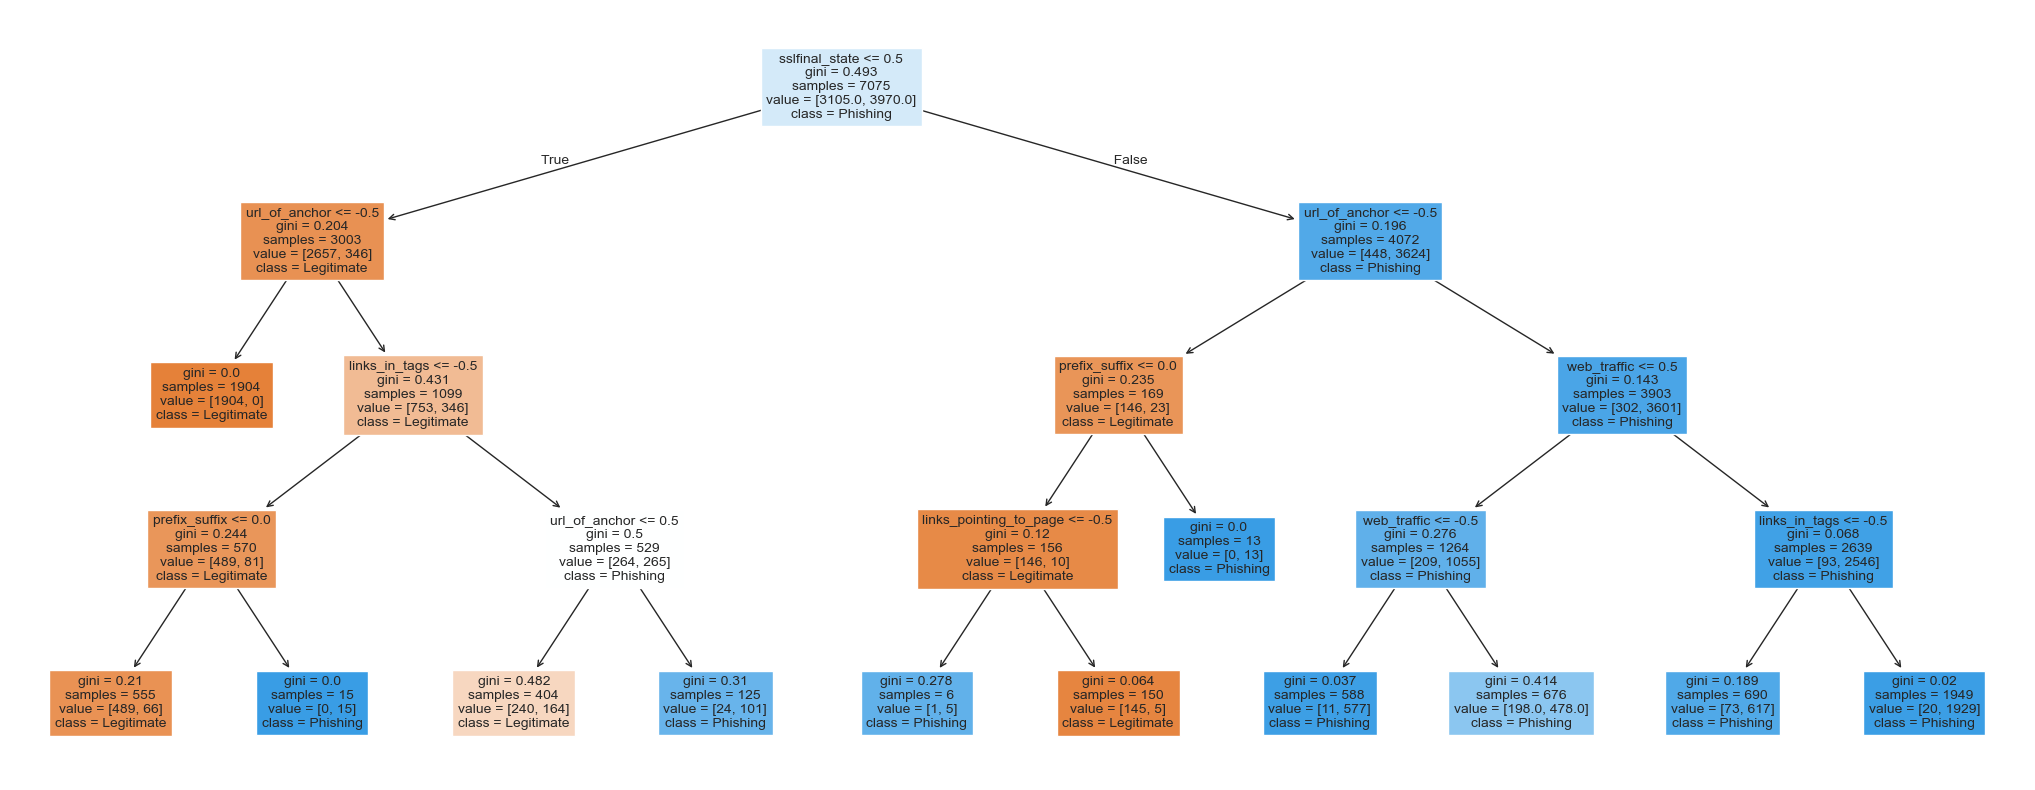

In [38]:
fig = plt.figure(figsize = (26, 10))
plot_tree(model, feature_names = X.keys(), class_names = ['Legitimate', 'Phishing'], filled = True)
plt.show()

Esimerkki vaiheittaisesta ohjeesta:
1. Tarkistetaan SSL-sertifikaatin tila `sslfinal_state`:
- Jos verkkosivustolla `sslfinal_stat` ≤ 0,5 siirretaan vaiheeseen 2
2. Tarkistetaan URL-ankkuri `url_of_anchor`:
- Jos URL-ankkuri on tavallinen `url_of_anchor` ≤ -0,5 luokitelkaa sivusto legaliksi koska tässä joukussa on 1904 legal-sivustoa ja 0 phishing-sivustoa.

Seuraavaksi päätetään, mitä puun syvyyttä käytetään mallin rakentamiseen. Tätä varten analysoidaan, miten luokittelun laatumetrit muuttuvat puun syvyyden muuttuessa, käyttämällä koulutus- ja validointijoukkoja:

In [39]:
depths = np.arange(1, 30)
scores = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=20)
    model.fit(train_data, train_targets)
    predictions = model.predict(valid_data)
    scores.append(accuracy_score(predictions, valid_targets))

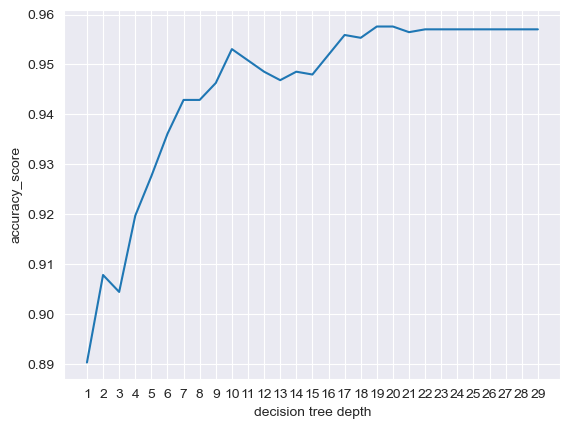

In [18]:
plt.plot(list(range(1, 30)), scores)
plt.xticks(list(range(1, 30)))
plt.xlabel('decision tree depth')
plt.ylabel('accuracy_score')
plt.show()

Saadun datan perusteella optimaalinen syvyys on 20 tai enemmän. Tarkistetaan luokituksen laatumetrit validointiaineistossa käyttäen syvyyttä 20:

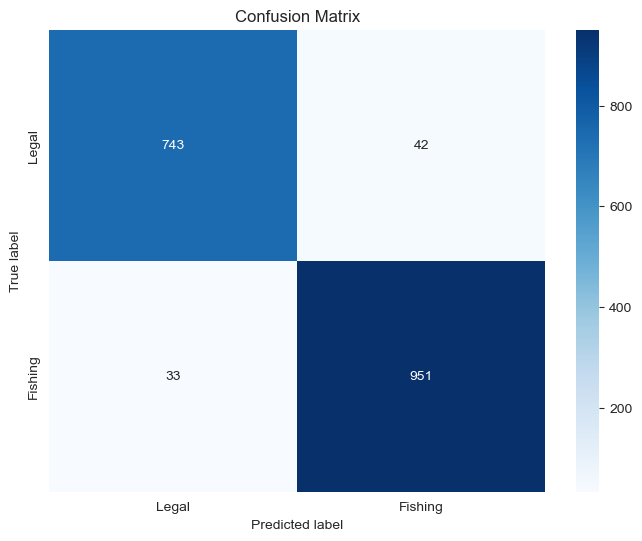

In [19]:
model = DecisionTreeClassifier(max_depth=20, random_state=20)
model.fit(train_data, train_targets)
predictions = model.predict(valid_data)
cm = confusion_matrix(valid_targets, predictions)
labels = ('Legal', 'Fishing')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(valid_targets, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       785
           1       0.96      0.97      0.96       984

    accuracy                           0.96      1769
   macro avg       0.96      0.96      0.96      1769
weighted avg       0.96      0.96      0.96      1769



### 3.4.2 Satunnaismetsä

Tässä osiossa käytetään satunnaismetsämallia luokitellaksi sivustot phishing- ja laillisiksi sivustoiksi. Aluksi rakennetaan satunnaismetsämallin. Käyttetään GridSearchCV -kirjastoa optimaalisten parametrien löytämiseen mallin rakentamiseksi. Asetetaan myös bootstrap=True, jotta voidaan käyttää tätä tapaa generaationäytteiden luomiseen puiden kouluttamiseksi:

In [21]:
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'bootstrap': [True],
    'criterion': ['gini'],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8],
    'random_state': [123]
}
# GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Parametrien haku opettusjoukon avulla 
train_targets = np.ravel(train_targets)
grid_search.fit(train_data, train_targets)

# Parhaan mallin ja parametrit
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

print("Best Parameters:", best_params_rf)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 500, 'random_state': 123}


In [22]:
# Carry out 10-fold cross-validation
cv_scores = cross_val_score(best_model_rf, train_data, train_targets, cv=10)

# Tulokset
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.96751412 0.9759887  0.96892655 0.95480226 0.96751412 0.97029703
 0.9688826  0.96746818 0.97878359 0.97029703]
Overall accuracy (avg. of folds): 0.9690


Rakennetaan muutamia puita niiden rakenteen analysoimiseksi:

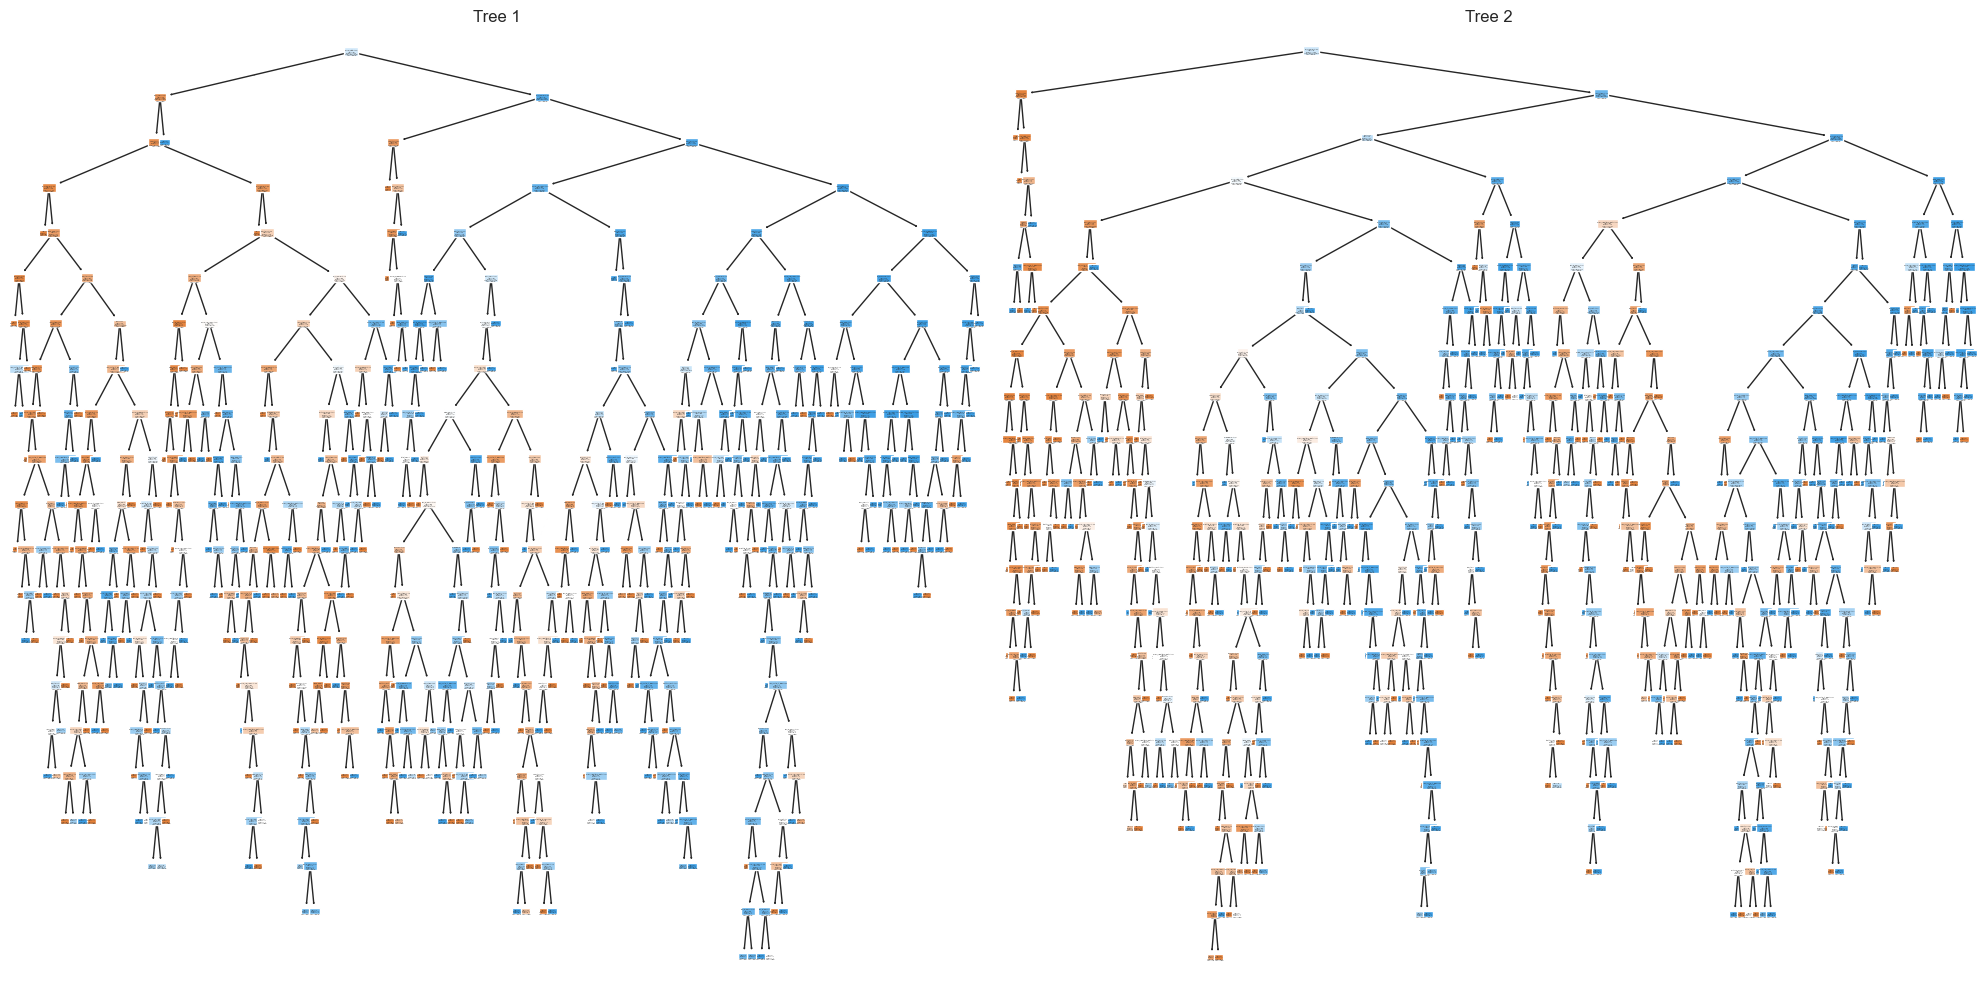

In [23]:
column_names = df_x.columns
# Puuiden lukumäärä, jotka halutaan piirtää
n_trees_to_plot = 2

# Luodaan kuvaaja
plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(best_model_rf.estimators_[i], filled=True,
              feature_names=column_names, class_names=labels)
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

Arvioitaessa puiden rakennetta havaitaan, että niillä on suuri syvyys ja kukin niistä on todennäköisesti ylikouluttanut. Kuitenkin, koska käytämme puiden yhdistelmää, tämä ei ole ongelma. Tarkistetaan mallin luokittelutehokkuus optimaalisesti valittujen parametrien perusteella:

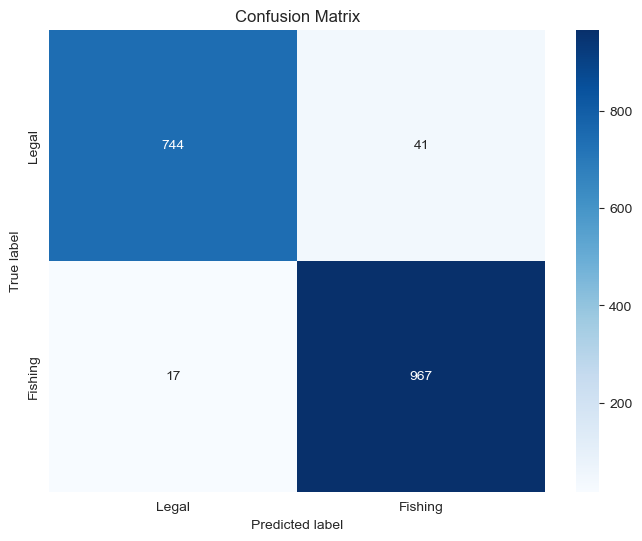

In [24]:
predictions = best_model_rf.predict(valid_data)

cm = confusion_matrix(valid_targets, predictions)
labels = ('Legal', 'Fishing')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(valid_targets, predictions))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       785
           1       0.96      0.98      0.97       984

    accuracy                           0.97      1769
   macro avg       0.97      0.97      0.97      1769
weighted avg       0.97      0.97      0.97      1769



## 3.5 Arviointi

### 3.5.1 Luokittelun laatumittojen (tarkkuus, kattavuus, F1-mittari) laskeminen päätöspuumallille

Aiemmassa tutkimusosiossa päätettiin päätöspuun syvyydeksi 20. Seuraavaksi on varmistettava, kuinka tehokas malli on testattaessa. Koulutetaan malli koko työajoukon käyttäen syvyyttä 20 ja arvioidaan luokituksen laatu testijoukolla mallin ylikoulutuksen tarkistamiseksi:

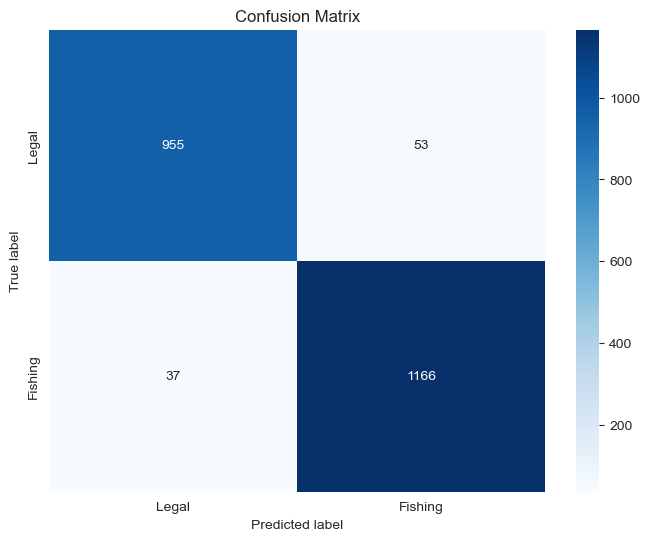

In [26]:
model_tuned = DecisionTreeClassifier(max_depth=20, random_state=20)
model_tuned.fit(work_data, work_targets)
predictions_test = model_tuned.predict(test_data)
cm = confusion_matrix(test_targets, predictions_test)
labels = ('Legal', 'Fishing')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(test_targets, predictions_test))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1008
           1       0.96      0.97      0.96      1203

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



#### ROC-käyrä päätöspuumallille

In [28]:
y_prob = model_tuned.predict_proba(test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(test_targets, y_prob)
roc_auc = auc(fpr, tpr)

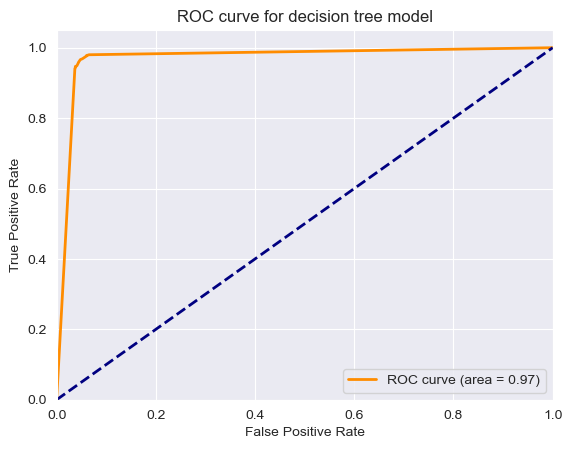

In [29]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for decision tree model')
plt.legend(loc="lower right")
plt.show()

Saaduista tiedoista nähdään, että malli ei ole ylikoulutettu, koska luokituksen tehokkuusparametrit ovat vertailukelpoisia validointi- (96%) ja testijoukossa (96%).

### 3.5.2 Luokittelun laatumittojen (tarkkuus, kattavuus, F1-mittari) laskeminen satunnaismetsämallille

Mallinnusosiossa löydettiin optimaalit parametrit satunnaismetsämallill. Seuraavaksi arvioidaan luokituksen laatu testiоjoukolla:

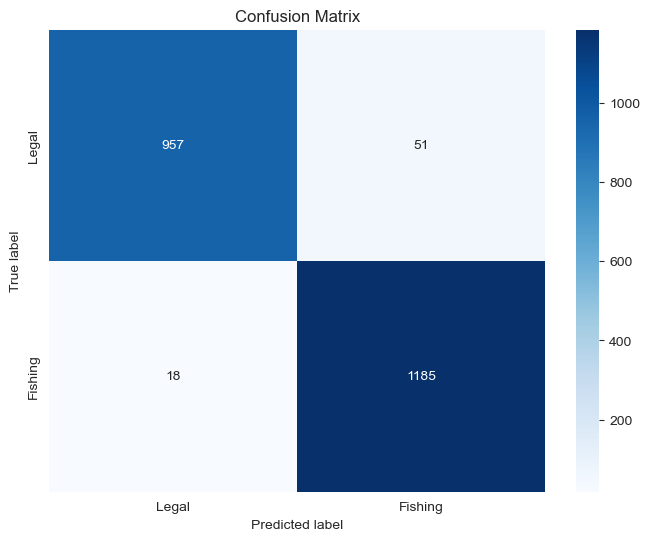

In [30]:
model_rf_tuned = RandomForestClassifier(**best_params_rf)
work_targets = np.ravel(work_targets)
model_rf_tuned.fit(work_data, work_targets)
predictions_test = model_rf_tuned.predict(test_data)

cm = confusion_matrix(test_targets, predictions_test)
labels = ('Legal', 'Fishing')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(test_targets, predictions_test))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.97      1008
           1       0.96      0.99      0.97      1203

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



Käytetään seuraavaksi ristivalidointia mallin tarkistamiseksi eri tietojen osajoukoilla, jotta nähdään, kuinka hyvin se toimii uusilla, näkymättömillä tiedoilla.

In [32]:
# Carry out 10-fold cross-validation
cv_scores = cross_val_score(model_rf_tuned, work_data, work_targets, cv=10)

# Show results
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.97062147 0.96949153 0.96610169 0.9740113  0.96606335 0.96945701
 0.98190045 0.97963801 0.96832579 0.96945701]
Overall accuracy (avg. of folds): 0.9715


Ristivalidoinnin tulokset osoittavat, että malli on vakaa ja toimii keskimääräisellä tarkkuudella, joka on lähes 0.97

Tarkastellaan piirteiden tärkeyttä:

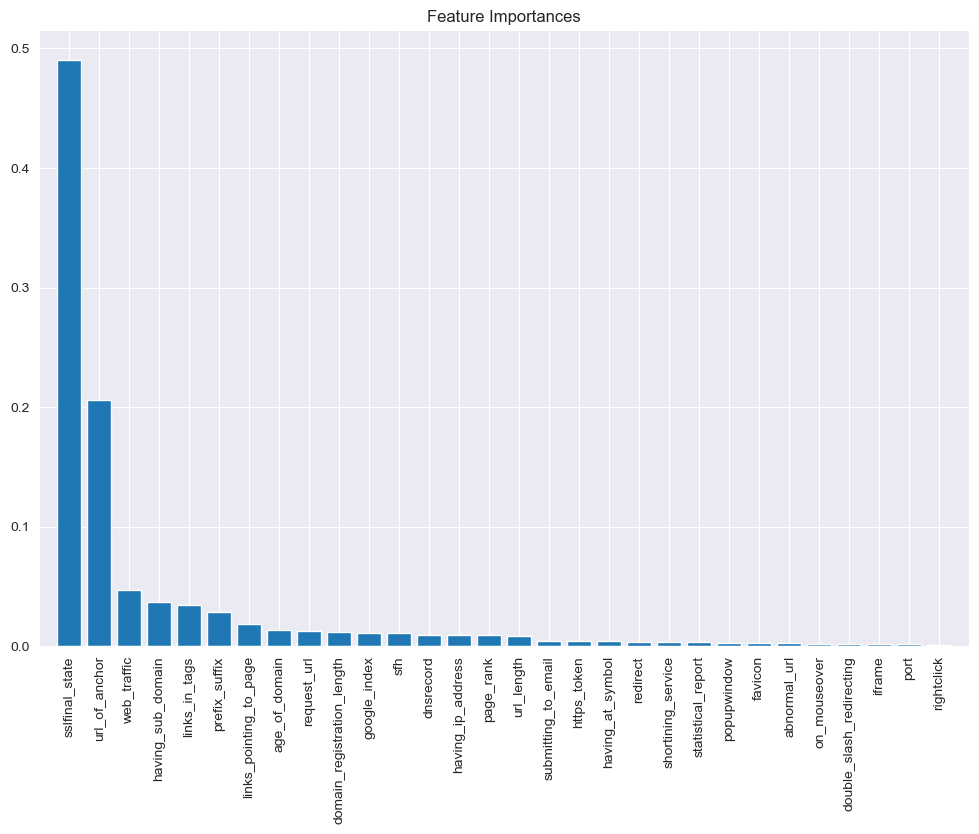

In [33]:
# Display the feature importances
importances = model_rf_tuned.feature_importances_
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
y_prob = model_rf_tuned.predict_proba(test_data)[:, 1]
fpr, tpr = roc_curve(test_targets, y_prob)
roc_auc = auc(fpr, tpr)

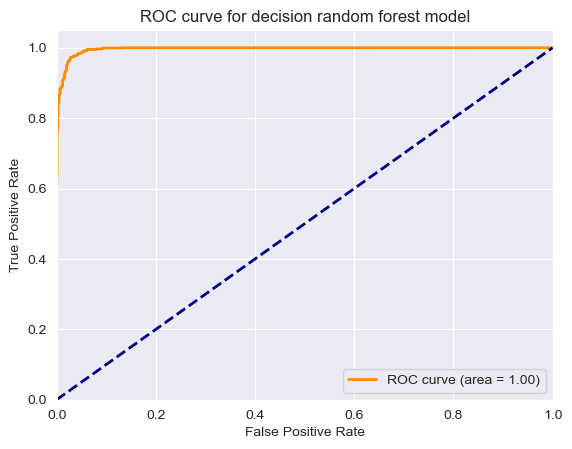

In [35]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for decision random forest model')
plt.legend(loc="lower right")
plt.show()

## 3.6 Tulosten esittely ja johtopäätökset


#### 1. Päätöspuumallin tarkkuus oli 0.96 validointijoukossa ja 0.96 testijoukossa. Tämä osoittaa, että malli ei ole ylikoulutettu. Päätöspuu ei ole kestävä ylikoulutukselle, joten on tärkeää seurata puun syvyyttä ja rajoittaa sitä, jotta uusien tietojen käsittelytehokkuus ei heikkene.
#### 2. Satunnaismetsämallin tarkkuus oli 0.97 validointijoukossa ja 0.97 testijoukossa. Tämä osoittaa, että malli ei ole ylikoulutettu. Satunnaismetsämallit ovat yleisesti kestäviä ylikoulutukselle, koska ne perustuvat enemmistöpäätöksiin useiden puiden välillä.
#### 3. Virhematriisista nähdään, että sekä päätöspuu- että satunnaismetsämallit ennustavat paremmin phishing-sivustoja kuin laillisia sivustoja.
#### 4. Piirteiden tärkeys osoittaa, että tärkein tekijä on `sslfinal_state`, jota seuraavat `url_of_anchor` ja `web_traffic`. Tekijöiden kuvaukset löytyvät osion 3.2.
#### 5. ROC-käyrä päätöspuumallille ja satunnaismetsälle osoittaa, että mallit toimivat korkealla tarkkuudella. Käyrän alla oleva pinta-ala (AUC - area under the curve) on 0.97 päätöspuumallille ja 1.00 satunnaismetsälle. AUC-parametri osoittaa, kuinka hyvin malli erottaa luokat. Mitä lähempänä arvo on 1:ä, sitä paremmin malli erottaa luokat. AUC-arvo 0.5 tarkoittaa, että malli ei erottele luokkia, vaan arvaa.
#### 6. Satunnaismetsämalli näytti parempia tuloksia kuin päätöspuumalli. Tämä johtuu siitä, että satunnaismetsä on kestävä ylikoulutukselle ja sillä on suurempi tarkkuus koska se perustuu enemmistöpäätöksiin useiden puiden välillä.